In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression, LogisticRegression
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
x = np.array([9.8, 13.1, 17.6, 25.4, 30.9, 38.5])
y = np.array([7060, 9350, 13900, 17200, 21400, 23800])

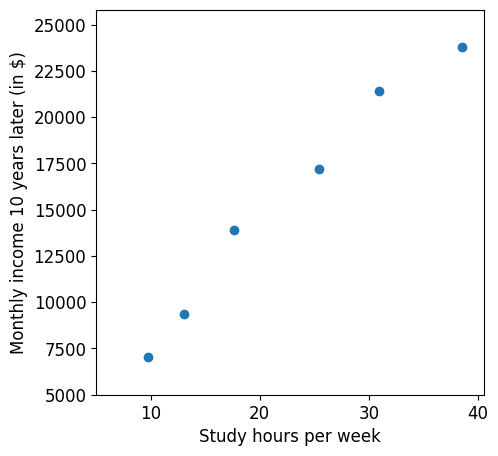

In [3]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(5,5))
### Your code here (3 lines) ###
plt.scatter(x, y)
plt.xlim([5, np.max(x)+2])
plt.ylim([5000, np.max(y)+2000])
plt.xlabel('Study hours per week')
plt.ylabel('Monthly income 10 years later (in $)')
plt.show()

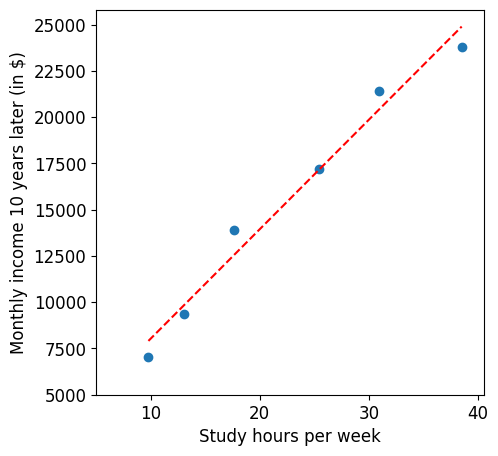

In [4]:
### Your code here (2 lines) ###
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

x_fit = np.linspace(np.min(x), np.max(x), 50)
y_fit = slope * x_fit + intercept

plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.plot(x_fit, y_fit, 'r--')
plt.xlim([5, np.max(x)+2])
plt.ylim([5000, np.max(y)+2000])
plt.xlabel('Study hours per week')
plt.ylabel('Monthly income 10 years later (in $)')
plt.show()

In [5]:
x_fit

array([ 9.8       , 10.38571429, 10.97142857, 11.55714286, 12.14285714,
       12.72857143, 13.31428571, 13.9       , 14.48571429, 15.07142857,
       15.65714286, 16.24285714, 16.82857143, 17.41428571, 18.        ,
       18.58571429, 19.17142857, 19.75714286, 20.34285714, 20.92857143,
       21.51428571, 22.1       , 22.68571429, 23.27142857, 23.85714286,
       24.44285714, 25.02857143, 25.61428571, 26.2       , 26.78571429,
       27.37142857, 27.95714286, 28.54285714, 29.12857143, 29.71428571,
       30.3       , 30.88571429, 31.47142857, 32.05714286, 32.64285714,
       33.22857143, 33.81428571, 34.4       , 34.98571429, 35.57142857,
       36.15714286, 36.74285714, 37.32857143, 37.91428571, 38.5       ])

In [6]:
y_fit   # came from `slope * x_fit + intercept`

array([ 7906.96784229,  8253.55904878,  8600.15025528,  8946.74146178,
        9293.33266828,  9639.92387478,  9986.51508128, 10333.10628777,
       10679.69749427, 11026.28870077, 11372.87990727, 11719.47111377,
       12066.06232026, 12412.65352676, 12759.24473326, 13105.83593976,
       13452.42714626, 13799.01835275, 14145.60955925, 14492.20076575,
       14838.79197225, 15185.38317875, 15531.97438525, 15878.56559174,
       16225.15679824, 16571.74800474, 16918.33921124, 17264.93041774,
       17611.52162423, 17958.11283073, 18304.70403723, 18651.29524373,
       18997.88645023, 19344.47765672, 19691.06886322, 20037.66006972,
       20384.25127622, 20730.84248272, 21077.43368922, 21424.02489571,
       21770.61610221, 22117.20730871, 22463.79851521, 22810.38972171,
       23156.9809282 , 23503.5721347 , 23850.1633412 , 24196.7545477 ,
       24543.3457542 , 24889.93696069])

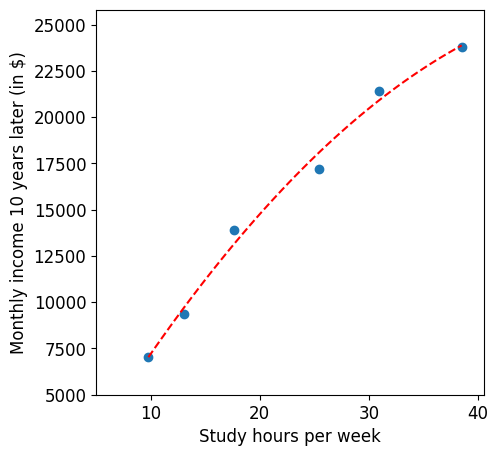

In [7]:
### Your code here (1 line) ###
coefficients = np.polyfit(x, y, 2)
slope2, slope1, intercept = coefficients   ##

x_fit = np.linspace(np.min(x), np.max(x), 50)
y_fit = slope2 * x_fit**2 + slope1 * x_fit + intercept  ##

plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.plot(x_fit, y_fit, 'r--')
plt.xlim([5, np.max(x)+2])
plt.ylim([5000, np.max(y)+2000])
plt.xlabel('Study hours per week')
plt.ylabel('Monthly income 10 years later (in $)')
plt.show()

In [8]:
x

array([ 9.8, 13.1, 17.6, 25.4, 30.9, 38.5])

In [10]:
x_new = x.reshape(-1, 1)
x_new.shape

(6, 1)

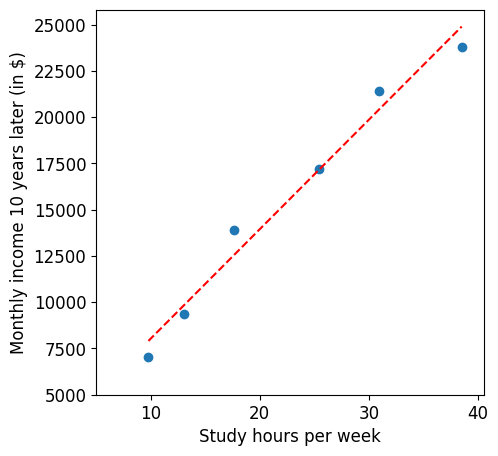

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

### Your code here (2 lines) ###
slope = model.coef_[0]
intercept = model.intercept_

x_fit = np.linspace(np.min(x), np.max(x), 50).reshape(-1, 1)
y_fit = model.predict(x_fit)

plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.plot(x_fit, y_fit, 'r--')
plt.xlim([5, np.max(x)+2])
plt.ylim([5000, np.max(y)+2000])
plt.xlabel('Study hours per week')
plt.ylabel('Monthly income 10 years later (in $)')
plt.show()

In [ ]:
x1 = np.array([9.8, 13.1, 17.6, 25.4, 30.9, 38.5])
x2 = np.array([2.0, 2.1, 4.0, 3.6, 4.3, 4.2])
y = np.array([7060, 9350, 13900, 17200, 21400, 23800])
X = np.column_stack((x1, x2))

model = LinearRegression()
model.fit(X, y)
coef = model.coef_
intercept = model.intercept_

x1_lin = np.linspace(np.min(x1), np.max(x1), 50)
x2_lin = np.linspace(np.min(x2), np.max(x2), 50)
### Your code here (2 lines) ###
# x1_grid, x2_grid = np.meshgrid(x1_lin, x2_lin)
# y_fit = coef[0] * x1_grid + coef[1] * x2_grid + intercept

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1_lin, x2_lin, y_fit, color='red', alpha=0.5)
ax.set_xlabel('Study hours per week (x1)')
ax.set_ylabel('Exercise hours per week (x2)')
ax.tick_params(axis='z', pad=10)
plt.show()

In [ ]:
### Your code here (2 lines) ###
# y_fit_x2_2 = coef[0] * x1_lin + coef[1] * 2 + intercept
# y_fit_x2_4 = coef[0] * x1_lin + coef[1] * 4 + intercept

plt.figure(figsize=(5,5))
plt.plot(x_fit, y_fit_x2_2, 'b--', label='2 hours exercise')
plt.plot(x_fit, y_fit_x2_4, 'm--', label='4 hours exercise')
plt.xlim([5, np.max(x)+2])
plt.ylim([5000, np.max(y)+2000])
plt.xlabel('Study hours per week')
plt.ylabel('Monthly income 10 years later (in $)')
plt.legend()
plt.show()

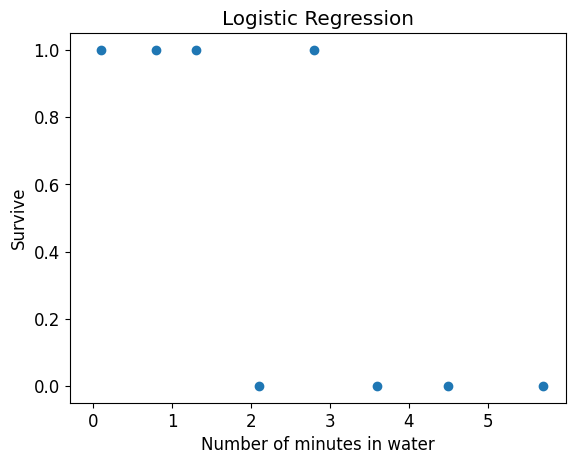

In [12]:
x = np.array([0.1, 0.8, 1.3, 2.1, 2.8, 3.6, 4.5, 5.7]).reshape(-1, 1)
y = np.array([1, 1, 1, 0, 1, 0, 0, 0])

plt.figure()
plt.scatter(x, y, label='Data points')
plt.xlim([-0.3,5.99])
plt.xlabel('Number of minutes in water')
plt.ylabel('Survive')
plt.title('Logistic Regression')
plt.show()

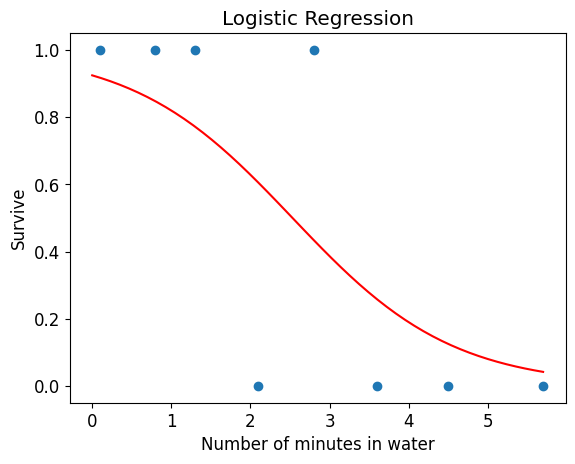

In [13]:
### Your code here (2 lines) ###
model = LogisticRegression()
model.fit(x, y)

x_fit = np.linspace(0, np.max(x), 50)
y_fit = model.predict_proba(x_fit.reshape(-1, 1))[:, 1]   # first column predict no, second column predict yes

plt.figure()
plt.scatter(x, y, label='Data points')
plt.plot(x_fit, y_fit, color='red', label='Logistic regression fit')
plt.xlabel('Number of minutes in water')
plt.ylabel('Survive')
plt.title('Logistic Regression')
plt.show()

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

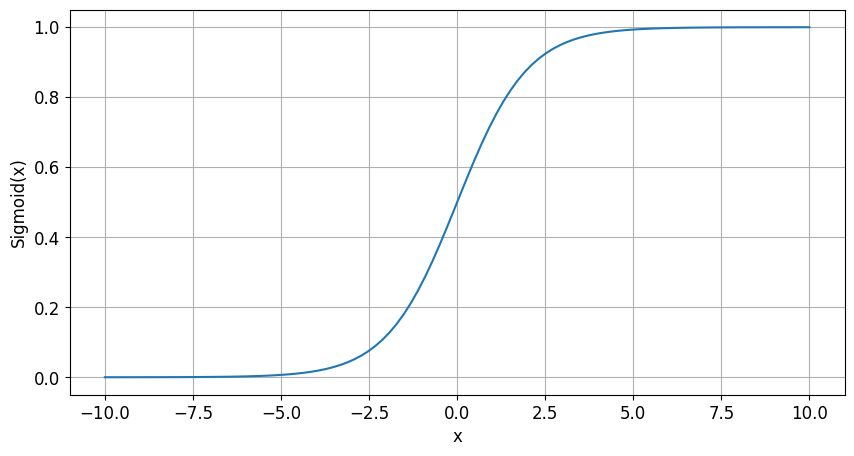

In [15]:
### Your code here (2 lines) ###
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.grid(True)
plt.show()

In [23]:
y_hat = np.array([200, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
y_hat.shape

(64,)

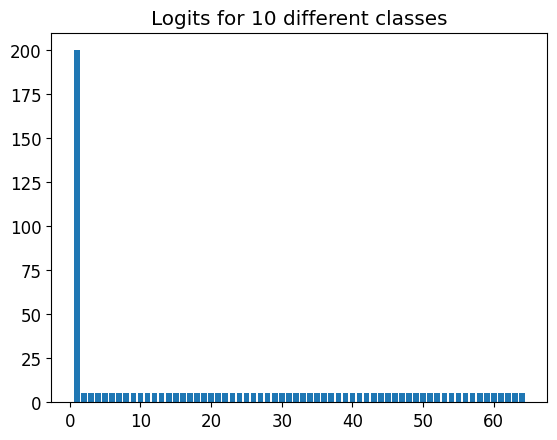

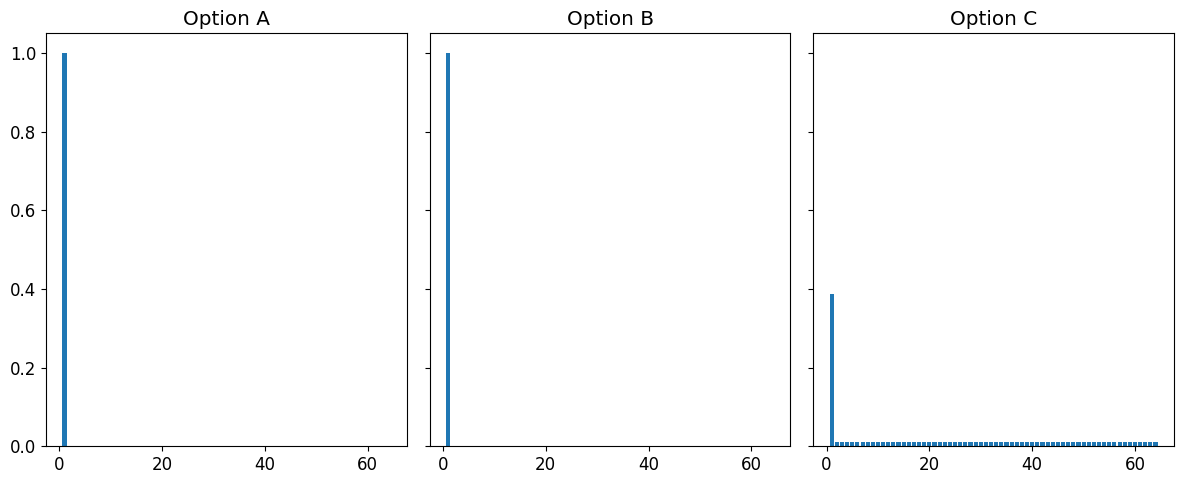

In [25]:
x = np.arange(1,65)
y_hat = np.array([200, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

plt.figure()
plt.bar(x, y_hat)
plt.title('Logits for 10 different classes')
plt.show()

### Your code here (3 lines) ###
max_probabilities = np.zeros_like(y_hat)
max_probabilities[np.argmax(y_hat)] = 1

softmax_probabilities = softmax(y_hat)

proportionate = y_hat / y_hat.sum()

fig, axes = plt.subplots(1, 3, figsize=(12,5), sharey=True)

axes[0].bar(x, max_probabilities)
axes[1].bar(x, softmax_probabilities)
axes[2].bar(x, proportionate)
axes[0].set_title('Option A')
axes[1].set_title('Option B')
axes[2].set_title('Option C')
plt.tight_layout()
plt.show()

In [26]:
from google.colab import files
uploaded = files.upload()

Saving sample_data.xlsx to sample_data.xlsx


In [27]:
df = pd.read_excel('/content/sample_data.xlsx')
df.head()

,Study Hours per Week,CGPA,Social Media Usage,Get Job Before Graduation
0,8.13,1.31,6.65,0
1,9.07,3.57,5.72,1
2,10.24,4.00,2.32,1
3,8.74,3.63,6.07,0
4,9.55,4.00,3.95,1


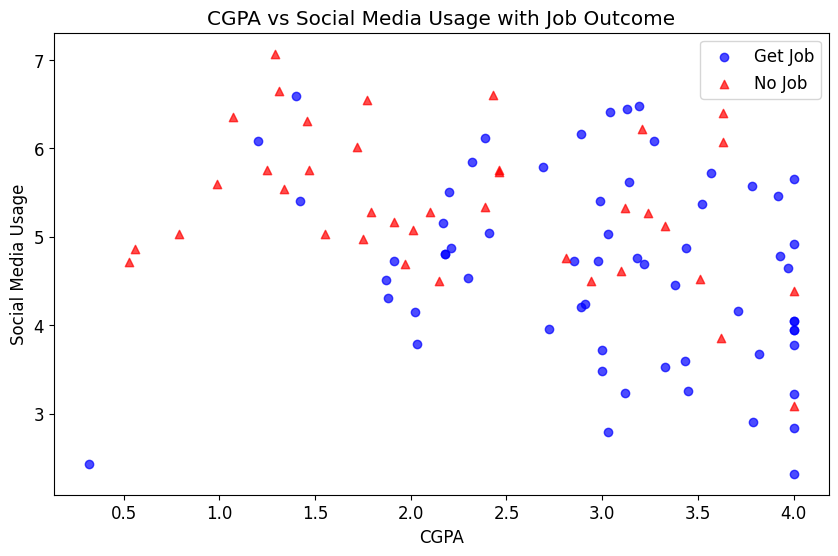

In [28]:
df_job = df[df['Get Job Before Graduation'] == 1]
df_no_job = df[df['Get Job Before Graduation'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(df_job['CGPA'], df_job['Social Media Usage'], color='blue',  marker='o', label='Get Job', alpha=0.7)
plt.scatter(df_no_job['CGPA'], df_no_job['Social Media Usage'], color='red', marker='^', label='No Job', alpha=0.7)
plt.xlabel('CGPA')
plt.ylabel('Social Media Usage')
plt.title('CGPA vs Social Media Usage with Job Outcome')
plt.legend()
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Your code here (2 lines) ###
X = df.iloc[:,:3]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Your code here (3 lines) ###
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 8  6]
 [ 1 15]]


In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Job', 'Get Job'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(list(y_train), dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(list(y_test), dtype=torch.float32).view(-1, 1)

Epoch 19: loss 0.67
Epoch 39: loss 0.65
Epoch 59: loss 0.63
Epoch 79: loss 0.61
Epoch 99: loss 0.60
Epoch 119: loss 0.58
Epoch 139: loss 0.57
Epoch 159: loss 0.56
Epoch 179: loss 0.55
Epoch 199: loss 0.54
Epoch 219: loss 0.53
Epoch 239: loss 0.53
Epoch 259: loss 0.52
Epoch 279: loss 0.52
Epoch 299: loss 0.52


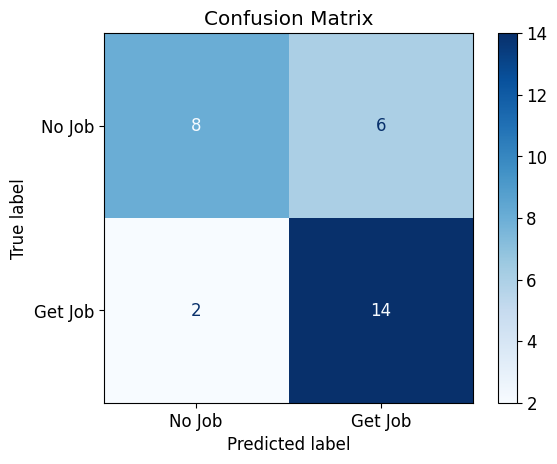

In [32]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3, 10)   # X has three features; hidden layer has 10 nodes
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

seed_num = 819
torch.manual_seed(seed_num)
np.random.seed(seed_num)

### Your code here (2 lines) ###
model = Net()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(300):
    ### Your code here (3 lines) ###
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 20 == 0:
      print('Epoch %d: loss %.2f' % (epoch,loss))

model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_class = (y_pred >= 0.5).float()

cm = confusion_matrix(y_test.numpy(), y_pred_class.numpy())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Job', 'Get Job'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()